In [ ]:
############ Cluster Test ############


(155128, 104)
[0 1]
0    153359
1      1769
Name: Cluster, dtype: int64


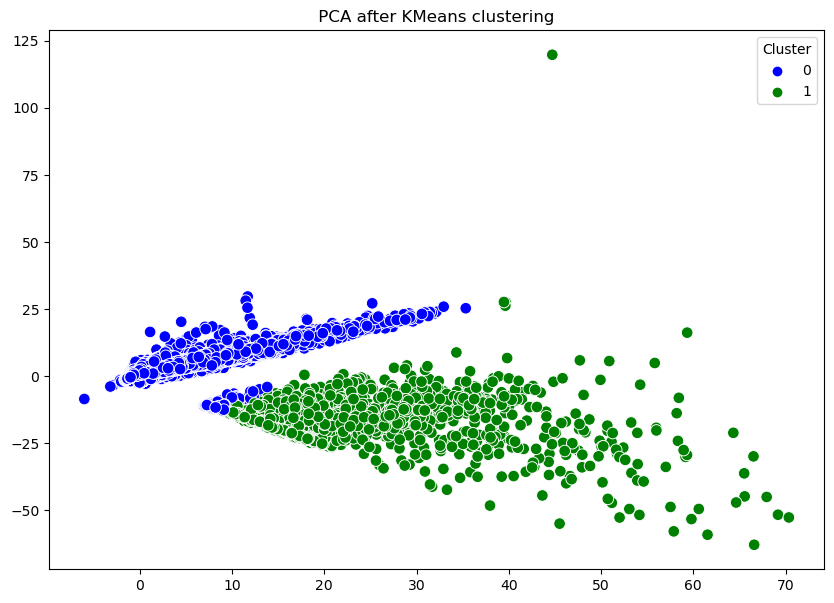

In [1]:
#clustering KMeans#####################################
import pandas as pd
import numpy as np
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

df = pd.read_csv('Behavioral data3.csv')

print(df.shape)

"""
pattern = r'average|std|num_changes'
selected_columns = [col for col in df.columns if re.search(pattern, col)]
df_new = df[selected_columns]
"""

X = df.iloc[:,1:-1].values
scaler = StandardScaler(); X = scaler.fit_transform(X)

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
df['Cluster'] = labels

#df.to_csv('data.csv', index=False)

unique_values = df['Cluster'].unique()
print(unique_values)

value_counts = df['Cluster'].value_counts()
print(value_counts)

"""
class_3_observations = df[df['Cluster'] == 3]
print(class_3_observations)

pca_90 = PCA(n_components = 89, random_state=5)
pca_90.fit(X)
X_pca_90 = pca_90.transform(X)
print('var by all 90 PCA = ', sum(pca_90.explained_variance_ratio_*100))
"""



pca_2 = PCA(n_components = 2, random_state=5)
pca_2.fit(X)
X_pca_2 = pca_2.transform(X)
X_pca_2.shape


plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:,0],y=X_pca_2[:,1],s=70,hue=df['Cluster'], palette=['blue', 'green']).set(title=' PCA after KMeans clustering ')
# plt.xlim(x_min, x_max)  # Set the limits for the x-axis
# plt.ylim(-75, 45)  # Set the limits for the y-axis

# sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=df['protected'], alpha=0.7)


#%%%%%%%%%%%%%%%%%%%%%%%%%%
# check the best features that give 90% of the important
#%%%%%%%%%%%%%%%%%%%%%%%%%%

"""
pca_95 = PCA(n_components = 0.90, random_state=5)
pca_95.fit(X)
X_pca_95 = pca_95.transform(X)


df_new = pd.DataFrame(X_pca_95,columns = ['PC' + str(i) for i in range(1, 28)])
df_new['label'] = df.iloc[:, -1:].values
df_new.head()
"""
pass

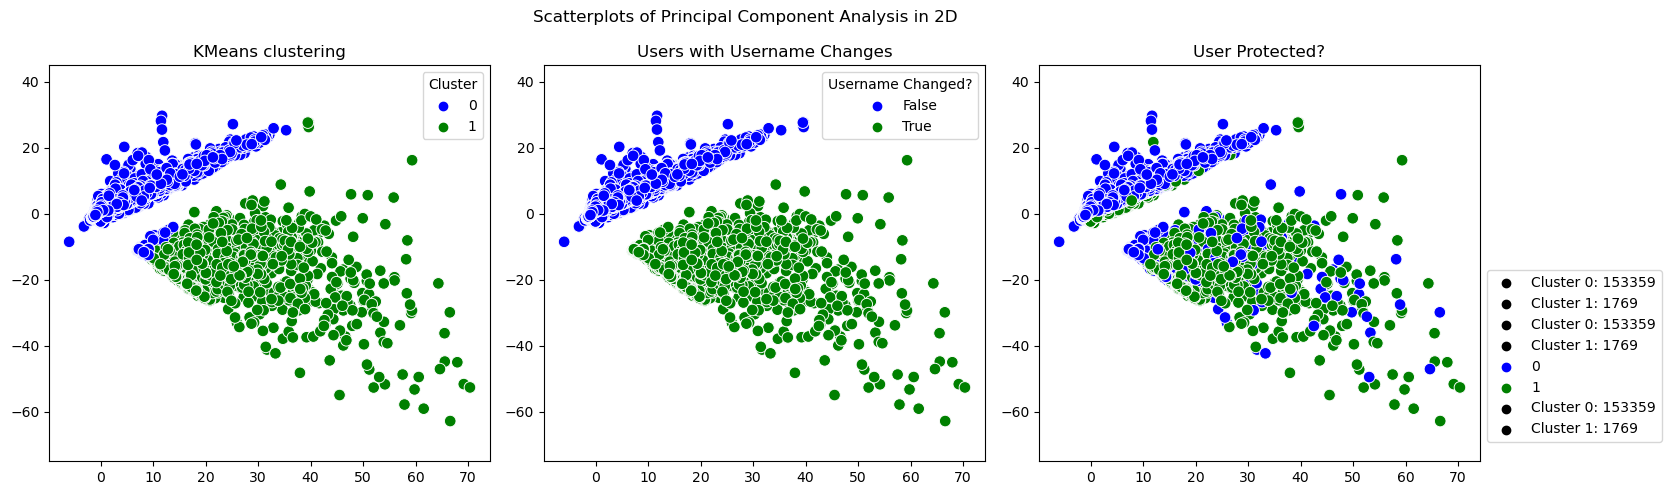

In [26]:
# Create a figure and subplots with a 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot 1
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=df['Cluster'], palette=['blue', 'green'], ax=axs[0])
for i, count in enumerate(value_counts):
    plt.scatter([], [], label=f"Cluster {i}: {count}", color='black')
axs[0].set_title('KMeans clustering')
axs[0].set_ylim(-75, 45)

# Scatterplot 2
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=df['Basic username num_changes'] > 0, palette=['blue', 'green'], ax=axs[1])
for i, count in enumerate(value_counts):
    plt.scatter([], [], label=f"Cluster {i}: {count}", color='black')
axs[1].set_title('Users with Username Changes')
axs[1].set_ylim(-75, 45)
legend = axs[1].get_legend()
legend.set_title('Username Changed?')

# Scatterplot 3
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=df['protected'], palette=['blue', 'green'], ax=axs[2])
for i, count in enumerate(value_counts):
    plt.scatter([], [], label=f"Cluster {i}: {count}", color='black')
axs[2].set_title('User Protected?')
axs[2].set_ylim(-75, 45)

# Set the main title for the subplot arrangement
fig.suptitle('Scatterplots of Principal Component Analysis in 2D')

# Adjust spacing between subplots
plt.tight_layout()

# Move the legend outside the subplots and adjust its position
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))

# Display the plots
plt.show()

(-75.0, 45.0)

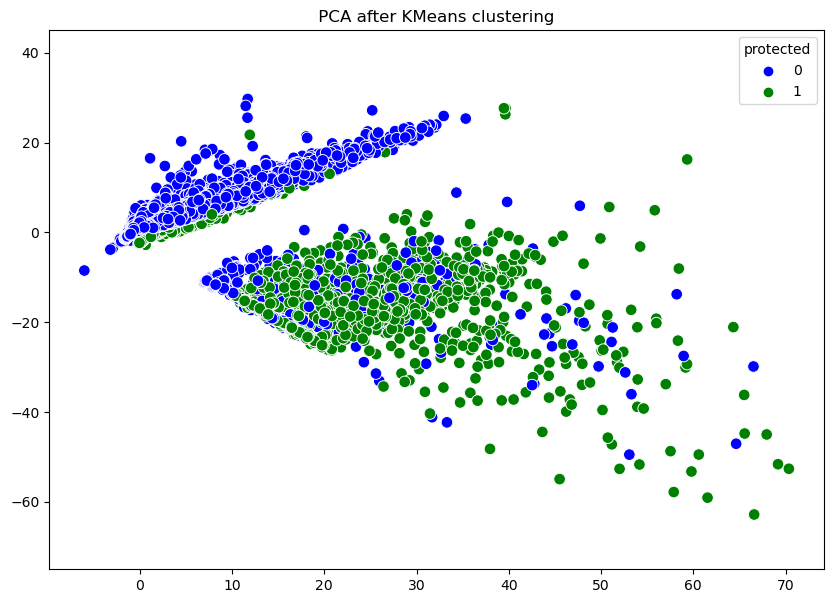

In [41]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X_pca_2[:,0],y=X_pca_2[:,1],s=70,hue=df['protected'], palette=['blue', 'green']).set(title=' PCA after KMeans clustering ')
# plt.xlim(x_min, x_max)  # Set the limits for the x-axis
plt.ylim(-75, 45)  # Set the limits for the y-axis

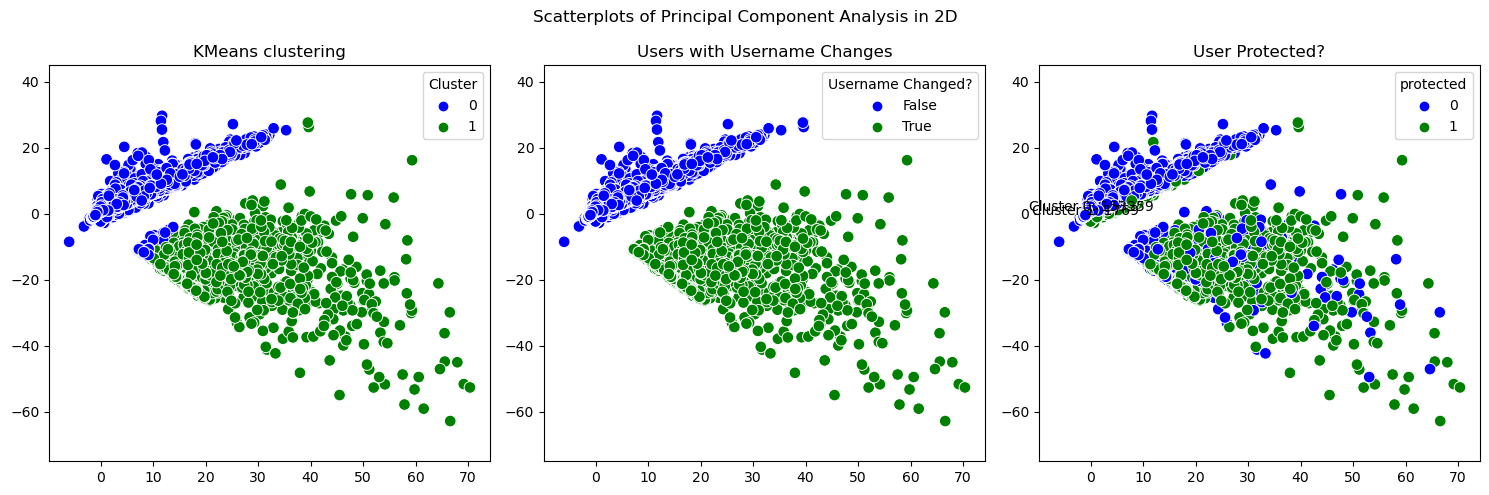

In [25]:
# Create a figure and subplots with a 1x3 grid
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatterplot 1
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=df['Cluster'], palette=['blue', 'green'], ax=axs[0])
# Annotate the plot with value_counts information
for i, count in enumerate(value_counts):
    plt.annotate(f"Cluster {i}: {count}", (X_pca_2[i, 0], X_pca_2[i, 1]), textcoords="data", ha='center', fontsize=10, color='black')
    
axs[0].set_title('KMeans clustering')
axs[0].set_ylim(-75, 45)

# Scatterplot 2
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=df['Basic username num_changes'] > 0, palette=['blue', 'green'], ax=axs[1])
axs[1].set_title('Users with Username Changes')
axs[1].set_ylim(-75, 45)
legend = axs[1].get_legend()
legend.set_title('Username Changed?')

# Scatterplot 3
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s=70, hue=df['protected'], palette=['blue', 'green'], ax=axs[2])
axs[2].set_title('User Protected?')
axs[2].set_ylim(-75, 45)

# Set the main title for the subplot arrangement
fig.suptitle('Scatterplots of Principal Component Analysis in 2D')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

fig.savefig('scatterplots.png')


In [20]:
######## feature important ############

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Y = df.iloc[:,-1:].values

# Create a SelectKBest object
numFeat = 15
selector = SelectKBest(f_classif, k=numFeat)

# Apply feature selection
X_new = selector.fit_transform(X, Y)

# Get the selected feature indices
selected_features_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_feature_names = df.columns[selected_features_indices]

print('best '+str(numFeat)+' features : \n ',selected_feature_names) 


#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#### ANOVA ############
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
import scipy.stats as stats

relevant_columns = 'Basic username cv_edit_distance'
selected_feature_names = df.columns[selected_features_indices]

# Extract the relevant columns for each group
group_0 = df[df['Cluster'] == 0][selected_feature_names]
group_1 = df[df['Cluster'] == 1][selected_feature_names]

# Perform the ANOVA test
statistic, p_value = stats.f_oneway(group_0, group_1)

# Print the test result
print("\n ANOVA Statistic:", statistic)
print("ANOVA p-value:", p_value)

#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
#### t-test ############
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

# Perform the t-test
t_statistic, p_value = stats.ttest_ind(group_0, group_1)

# Print the test result
print("\n T-Test Statistic:", t_statistic)
print("T-Test p-value:", p_value)

best 15 features : 
  Index(['Basic full_name average_edit_distance',
       'Basic full_name cv_edit_distance', 'Basic full_name var_edit_distance',
       'Basic username average_edit_distance',
       'Basic username cv_edit_distance',
       'Basic username edit_distance_per_character',
       'Basic username mad_edit_distance', 'Basic username max_edit_distance',
       'Basic username median_edit_distance',
       'Basic username min_edit_distance', 'Basic username mode_edit_distance',
       'Basic username num_changes', 'Basic username range_edit_distance',
       'Basic username skew_edit_distance',
       'Basic username std_edit_distance'],
      dtype='object')

 ANOVA Statistic: [9.91972338e+03 1.29201857e+04 1.53258723e+03 1.46076928e+06
 2.20982052e+06 3.51209359e+06 4.29704106e+05 1.51794335e+06
 1.44576001e+06 1.25092341e+06 1.40034360e+06 4.08100762e+05
 1.16415590e+05 2.05041070e+04 2.32798745e+05]
ANOVA p-value: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

 T-Tes

df_1_chk shape :  (3, 15)
mean_df shape :  (15, 3)


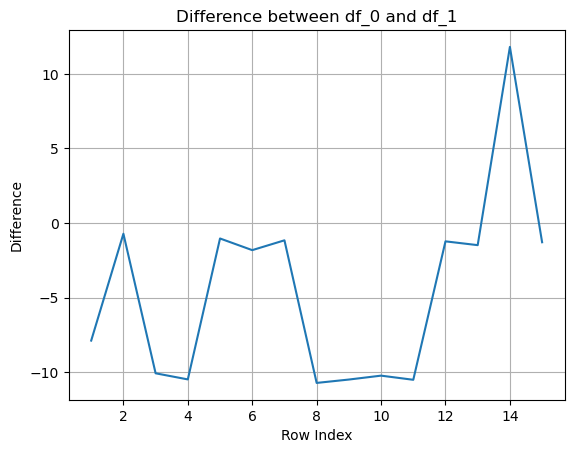

user ids of the small group :  
 116                  10017472
176       1002323030268313601
223       1003133830646173706
611       1008018242638524416
639       1008491334750167040
                 ...         
154887     996046841757274112
154901     996247629133627393
154979     997620077599035392
154993     997838955327373313
155080     999411095906336768
Name: user_id, Length: 1772, dtype: int64


<Figure size 640x480 with 0 Axes>

In [6]:

###### checks ###########

df_0 = df[df['Cluster']==0][selected_feature_names]
df_1 = df[df['Cluster']==1][selected_feature_names]
df_1_chk = df_1[df_1['Basic username num_changes'] == 0]
print('df_1_chk shape : ',df_1_chk.shape)


# Calculate the mean for each dataframe
mean_df_0 = df_0.mean()
mean_df_1 = df_1.mean()
# Create a new dataframe with the means
mean_df = pd.DataFrame({'bigger_df_0': mean_df_0, 'smaller_df_1': mean_df_1})
mean_df.reset_index(inplace=True)

# Print the new dataframe
print('mean_df shape : ',mean_df.shape)


## view in HTML and CSV ###
"""
html_table = mean_df.to_html(float_format=lambda x: f'{x:.2f}')
mean_df.to_html('mean_table.html')

pd.set_option('display.float_format', '{:.2f}'.format)
mean_df.to_csv('mean_df.csv', index=False, float_format='%.2f')
"""

# Calculate the differences between each row
diff_df = mean_df_0 - mean_df_1

rng = list(range(1,len(diff_df)+1))
# Plot the differences
plt.grid()
plt.plot(rng,diff_df)
plt.xlabel('Row Index')
plt.ylabel('Difference')
plt.title('Difference between df_0 and df_1')
plt.show()
plt.figure()



# the user ids from the small class
group_1 = df[df['Cluster'] == 1]['user_id']
print('user ids of the small group :  \n',group_1)

# to CSV!!!
#group_1.to_csv('group_1 user ids.csv')

In [37]:

df_0 = df[df['Cluster']==0]
df_1 = df[df['Cluster']==1]


df_0_chk = df_0[df_0['protected'] == 0]
print('classs 0 not privet',df_0_chk.shape)
df_1_chk = df_1[df_1['protected'] == 0]
print('classs 1 not privet',df_1_chk.shape)


df_0_chk = df_0[df_0['protected'] == 1]
print('classs 0 privet',df_0_chk.shape)
df_1_chk = df_1[df_1['protected'] == 1]
print('classs 1 privet',df_1_chk.shape)


# Get the indices of data points in cluster 1
cluster1_indices = np.where(df['Cluster'] == 1)[0]

# Randomly select 80% of the indices
random_indices = np.random.choice(cluster1_indices, int(0.786 * len(cluster1_indices)), replace=False)

# Assign 1 to the "protected" column for the selected indices
df.loc[random_indices, 'protected'] = 1


df_0 = df[df['Cluster']==0]
df_1 = df[df['Cluster']==1]


df_0_chk = df_0[df_0['protected'] == 0]
print('classs 0 not privet',df_0_chk.shape)
df_1_chk = df_1[df_1['protected'] == 0]
print('classs 1 not privet',df_1_chk.shape)


df_0_chk = df_0[df_0['protected'] == 1]
print('classs 0 privet',df_0_chk.shape)
df_1_chk = df_1[df_1['protected'] == 1]
print('classs 1 privet',df_1_chk.shape)

# df.to_csv('Behavioral data3.csv',index = False)

classs 0 not privet (152781, 105)
classs 1 not privet (1742, 105)
classs 0 privet (575, 105)
classs 1 privet (30, 105)
classs 0 not privet (152781, 105)
classs 1 not privet (374, 105)
classs 0 privet (575, 105)
classs 1 privet (1398, 105)


In [27]:
df_0 = df[df['Cluster']==0]
df_1 = df[df['Cluster']==1]

df_1_chk = df_1[(df_1['protected'] != 0)]
print('number of users who change all three features in group 1 (1772) :', len(df_1_chk))

df_1_chk = df_0[(df_0['protected'] != 0)]
print('number of users who change all three features in group 0 (153356) :', len(df_1_chk))


df_1_chk = df_1[(df_1['Basic username num_changes'] != 0) & (df_1['Basic full_name num_changes'] != 0) & (df_1['Basic description num_changes'] != 0)& (df_1['Privacy Exists'] == 1)]
print('number of users who change all three features and blocked in group 1 (1772):', len(df_1_chk))

df_1_chk = df_0[(df_0['Basic username num_changes'] != 0) & (df_0['Basic full_name num_changes'] != 0) & (df_0['Basic description num_changes'] != 0)& (df_1['Privacy Exists'] == 1)]
print('number of users who change all three features and blocked in group 0 (1772) :', len(df_1_chk))




group_1 = df[df['Cluster'] == 1]['user_id']
#print('user ids of the small group :  \n',group_1)
#print(group_1.head(30))
print('the 80 users ids who blocked : \n',df_1_chk['user_id'])

number of users who change all three features in group 1 (1772) : 1398
number of users who change all three features in group 0 (153356) : 575
number of users who change all three features and blocked in group 1 (1772): 80
number of users who change all three features and blocked in group 0 (1772) : 0
the 80 users ids who blocked : 
 Series([], Name: user_id, dtype: float64)


In [11]:
###### investigate df #########


features = ['Amount',
            'change username count','count changes in username mean',
            'change full name count','count changes in full name mean',
            'change description count','count changes in description mean',
            'average favourites count diff','average followers count diff','average statuses count diff',
            'Three text features change count','Three text features change and blocked count','blocked users count']
print(features)
class_0_data = [153356,89,0,8140,0.08,21260,0.25,37.42,5.83,32.15,2,0,2317] 
class_1_data = [1772,1769,1.23,1175,1.25,1193,1.69,72.68,8,50.57,908,80,124]

invst_df = pd.DataFrame({'feature': features, 'class 0': class_0_data, 'class 1': class_1_data})

# Write DataFrame to HTML
invst_df.to_html('invst_df.html')

invst_df

['Amount', 'change username count', 'count changes in username mean', 'change full name count', 'count changes in full name mean', 'change description count', 'count changes in description mean', 'average favourites count diff', 'average followers count diff', 'average statuses count diff', 'Three text features change count', 'Three text features change and blocked count', 'blocked users count']


,feature,class 0,class 1
0,Amount,153356.00,1772.00
1,change username count,89.00,1769.00
2,count changes in username mean,0.00,1.23
3,change full name count,8140.00,1175.00
4,count changes in full name mean,0.08,1.25
5,change description count,21260.00,1193.00
6,count changes in description mean,0.25,1.69
7,average favourites count diff,37.42,72.68
8,average followers count diff,5.83,8.00
9,average statuses count diff,32.15,50.57


In [18]:
df = pd.read_csv('BehavioralData3.csv')
df = df.drop(['days_since_creation'],axis='columns')
print(df.shape)


(155128, 104)
